# Мататематички методи за машинско учење 2023
## Домаћи задатак број 7

<div class="alert alert-block alert-danger">
<b>Име и презиме студента:</b> Никола Петровић

<b>Број индекса:</b> 1466
    
</div>    

<div class="alert alert-block alert-info">
<b>Упутство за израду и предају домаћег задатака: </b> 
    
    1. Пре почетка израде промените име датотеке у 07Domaci_Ime_Prezime. (убаците своје име и презиме) 
    2. Попуните ћелију испод наслова одговарајућим подацима. 
    1. Употреба ћирилице није обавезна за предају домаћег задатка.
    4. За решавање задатака, уколико је потребно, отворите испод текста задатка додатне ћелије за уписивање текстуалног одговора (Markdown) или програмског кода (Code).
    1. Сва израчунавања, уколико је потребно, вршити у Python-у.
    5. Након завршетка израде решења домаћег Notebook документ сачувати у pdf формату и проследити га наставнику. То можете да урадите или кроз Teams или на мејл адресу jovana.dzunic@elfak.ni.ac.rs

</div> 

In [112]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

**Задатак 1.** а) Израчунати DFT вектора генерисаних наредним кодом.


(5 поена)

In [2]:
u1 = np.ones(8)
u2 = np.array([1, -1j, 1j, -1])

# Izračunavanje DFT za vektore u1 i u2
dft_u1 = np.fft.fft(u1)
dft_u2 = np.fft.fft(u2)

print("DFT za vektor u1:\n", dft_u1)
print("DFT za vektor u2:\n", dft_u2)


DFT za vektor u1:
 [8.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DFT za vektor u2:
 [0.+0.j 0.-2.j 2.+2.j 2.+0.j]


<div class="alert alert-block alert-info">
<b> Тачно 
    
5/5 поена</b> </div>

б) Ако је позната DFT вектора $v,$ $V=DFT(v),$ колико износи $DFT(3v)?$


(5 поена)

In [3]:
# Primer vektora v
v = np.array([1, 2, 3, 4, 5])

# Izračunavanje DFT za vektor v
V = np.fft.fft(v)

# Izračunavanje DFT za vektor 3v
dft_3v = np.fft.fft(3 * v)

# Provera jednakosti DFT(3v) i 3 * V
print("DFT(3v):\n", dft_3v)
print("3 * V:\n", 3 * V)


DFT(3v):
 [45.  +0.j         -7.5+10.3228644j  -7.5 +2.43689772j -7.5 -2.43689772j
 -7.5-10.3228644j ]
3 * V:
 [45.  +0.j         -7.5+10.3228644j  -7.5 +2.43689772j -7.5 -2.43689772j
 -7.5-10.3228644j ]


<div class="alert alert-block alert-info">
<b> Тачно 
    
5/5 поена</b> </div>

**Задатак 2.** Користећи брзу Фуријеову трансформацију написати код за брзо множење бројева у бројном систему основе $8.$

(10 поена)

In [113]:
n1, n2 = rndm.randint(333, 556, 2)
print(n1)
print(n2)
br1 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n1 - 1))  
br2 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n2 - 1))  

print(br1)
print(br2)

# Konvolucija
product_conv = fftconvolve(br1, br2).real.round().astype(int)

# Korekcija rezultata
carry = np.zeros(product_conv.shape, dtype=int)
for i in range(len(product_conv) - 1):
    carry[i + 1] = product_conv[i] // 8
    product_conv[i + 1] += carry[i + 1]
    product_conv[i] %= 8

# Uklanjanje vodećih nula
product_conv = np.trim_zeros(product_conv, 'f')
print("Rezultat množenja (osnovica 8):", product_conv)


468
373
[1 5 3 4 4 6 2 4 0 0 2 6 2 1 5 1 3 3 3 2 4 0 6 0 1 4 2 5 0 5 4 1 2 0 4 3 3
 2 6 2 5 6 1 2 5 1 5 5 5 2 4 5 4 6 3 5 0 5 2 4 2 3 6 4 0 2 6 0 5 1 4 6 6 5
 6 3 6 3 6 0 5 6 1 5 1 1 3 2 4 4 2 0 4 3 0 1 5 5 4 6 1 6 0 1 6 3 2 4 5 6 5
 3 1 4 2 2 1 5 5 2 1 0 2 1 3 4 2 5 0 1 5 3 6 0 1 0 6 1 6 5 6 1 1 4 5 4 2 3
 2 2 4 4 6 1 1 3 0 4 6 4 6 3 2 1 1 1 3 1 4 1 4 0 1 3 6 4 1 1 1 1 1 2 3 3 3
 1 3 6 1 3 4 1 2 6 0 4 4 1 0 5 3 4 3 1 4 0 2 0 4 1 2 6 0 6 2 5 2 4 0 5 1 5
 2 5 2 3 6 4 4 0 2 6 5 5 2 2 5 4 3 4 0 4 5 3 3 5 0 0 0 4 4 4 3 4 3 3 2 4 1
 1 5 3 4 5 6 1 6 1 5 1 0 1 6 2 2 1 3 0 2 6 6 4 1 1 4 6 1 6 3 3 0 4 3 6 5 0
 3 0 4 3 6 3 5 3 4 0 2 0 4 4 6 4 0 5 5 3 1 3 3 5 2 1 4 1 0 2 3 3 1 5 4 6 6
 5 2 4 6 6 4 6 0 1 2 6 4 5 2 1 1 6 3 6 3 6 3 4 4 5 0 2 0 4 5 2 5 1 1 1 4 5
 1 1 5 6 1 5 2 5 2 0 1 3 0 3 5 3 3 1 0 2 3 5 6 0 4 1 6 1 6 4 4 4 3 3 5 1 1
 4 4 0 0 1 6 5 2 6 4 3 5 1 6 6 1 3 6 3 5 1 2 5 1 5 3 0 2 4 4 4 6 4 3 0 3 0
 4 1 0 0 5 6 0 6 0 1 5 3 6 6 6 4 2 4 1 4 1 1 5 6]
[3 5 0 0 5 4 5 1 4 5 3 1 0 0 6 6 5 3 3 5 5

<div class="alert alert-block alert-info">
<b> Не ради пренос и замену цифара како ваља. Размислите како се врши сабирање са потписивањем, од које цифре се полази. 
    
5/10 поена</b> 
Функција trim_zeros брише нуле и са почетка и са краја низа. То није добро.     
Израчунавање преноса може да се ради у мање итерација ако се користе операције над низовима. На примеру бројева са мало цифара види се проблем.</div>

<b><span style="font-size: 44px; color: purple;">Ispravak</span></b>

In [128]:
n1, n2 = rndm.randint(1, 3, 2)

print(n1)
print(n2)
br1 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n1 - 1))
br2 = np.append(rndm.randint(1, 7, 1), rndm.randint(0, 7, n2 - 1))

print(br1)
print(br2)

# Konvolucija
product_conv = fftconvolve(br1[::-1], br2[::-1]).real.round().astype(int)

# Korekcija rezultata (prenosenje i ostatak)
carry = 0
for i, digit in enumerate(product_conv):
    temp = digit + carry
    product_conv[i] = temp % 8
    carry = temp // 8

# Dodavanje konacnog prenosenja ako je potrebno
if carry:
    product_conv = np.append(product_conv, carry)

# Okretanje rezultata i uklanjanje vodecih nula
product_conv = np.trim_zeros(product_conv[::-1], 'f')# parametar 'f' b predstavlja uklanjanje nula samo sa pocetka niza

# Pretvaranje svake cifre u njen oktalni prikaz i spajanje rezultujućih stringova
octal_result = '0o' + ''.join([str(digit) for digit in product_conv])

# Ispis rezultata kao oktalnog broja
print("Rezultat množenja (osnova 8):")
octal_result


2
1
[3 2]
[5]
Rezultat množenja (osnova 8):


'0o202'

32x5
  
  12   (5x2=10(dekadno) ili 12 oktalno)

 17    (5x3=15 iliti 17 oktalno)

 ostaje nam 2 na kraju, 1+7=8 to znaci da prenosimo 1 a pisemo 0, 1+1=2, konacno:
 
 202   (oktalnim sabiranjem dobijamo trazeni rezultat)



In [1]:
x1="0o32"
x2="0o5"
oct(int(x1,8)*int(x2,8))

'0o202'

<div class="alert alert-block alert-info">
Уместо два корака fft можете да користите конволуцију која већ користи fft</div>

In [24]:
from scipy.signal import fftconvolve

In [25]:
fftconvolve(br1,br2) 

array([12])

<div class="alert alert-block alert-info">
<b> Тачно. Исправљање цифара на основу преноса можете брже да обавите уколико употребите приступ из примера 10, радна свеска 10. 
    
8/10 поена</b> 
</div>

**Задатак 3.** Функција $f$ је узоркована у еквидистантним тачкама на интервалу $[-\pi,\pi).$ Вектор $y$ садржи резултате овог узорковања. Након примене функције `fft` на вектор $y$ добијен је вектор $c=\begin{bmatrix}0 & -5i & 1-3i & 4 & 0 & 4 & 1+3i & 5i\end{bmatrix}.$ Наћи вектор $y$ и тригонометријски полином који интерполира функцију $f$ на узоркованим подацима. Дати графички приказ података и добијеног тригонометријског полинома.


(10 поена)

<div class="alert alert-block alert-info">
<b> Није добро. Погледајте радне свеске 26 и 27. Интерполациони полином мора да пролази кроз узорке. 
    
5/10 поена</b> 

Користити што више паралелизацију уграђену у операције над низовима.</div>

<b><span style="font-size: 44px; color: purple;">Ispravak</span></b>

ak dobijen iz C: [-0.  2.  8.  0.  8.  2.  0.]
bk dobijen iz C: [ 10.   6.  -0.  -0.  -0.  -6. -10.]


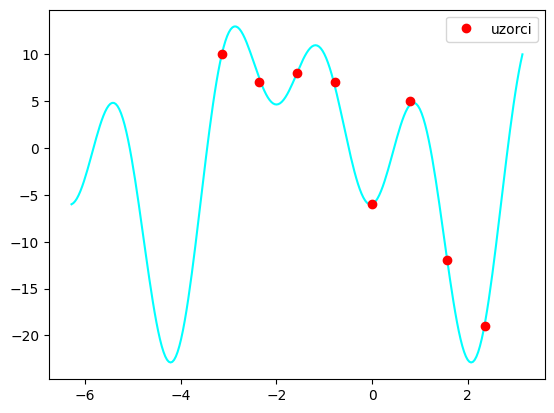

In [131]:
# Iz materijala, radna sveska 27. Furijeova matrica

N = 8
c = np.array([0, -5j, 1-3j, 4, 0, 4, 1+3j, 5j])
y = np.round(np.real(np.fft.ifft(c * N)))
sample_interval = np.linspace(-np.pi, np.pi, len(c), endpoint=False)#[-pi, pi)
N = len(y)
n = int(np.floor((N-1)/2))
ak = np.empty(N)
bk = np.empty(N)
a0 = y.mean()

akC = 2*np.real(c[1:N+1])
bkC = -2*np.imag(c[1:N+1])
print("ak dobijen iz C:", akC)
print("bk dobijen iz C:", bkC)

ak = akC
bk = bkC
yint = a0 + np.sum(ak[0:n]*np.cos(np.outer(xk, np.arange(1,n+1))), axis=1) + np.sum(bk[0:n]*np.sin(np.outer(xk, np.arange(1,n+1))), axis=1)

plt.plot(xk - np.pi, yint, 'aqua')
plt.plot(sample_interval, y, 'ro', label=r'uzorci')
plt.legend()

<div class="alert alert-block alert-info">
<b> Тачно.  
    
10/10 поена</b> 
</div>

<div class="alert alert-block alert-info">
<b> Укупно    
28/30 поена</b> </div>